In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [6]:
from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [8]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [9]:
y=pd.DataFrame(target)

In [10]:
y


,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [11]:
y.describe()

,0
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [13]:
y.info

<bound method DataFrame.info of         0
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
..    ...
501  22.4
502  20.6
503  23.9
504  22.0
505  11.9

[506 rows x 1 columns]>

In [27]:
x=pd.DataFrame(data)

In [28]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [29]:
x.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

In [95]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=23)

In [96]:
xtrain,xtest,ytrain,ytest

(           0     1      2    3      4      5     6       7     8      9   \
 175   0.06664   0.0   4.05  0.0  0.510  6.546  33.1  3.1323   5.0  296.0   
 225   0.52693   0.0   6.20  0.0  0.504  8.725  83.0  2.8944   8.0  307.0   
 61    0.17171  25.0   5.13  0.0  0.453  5.966  93.4  6.8185   8.0  284.0   
 13    0.62976   0.0   8.14  0.0  0.538  5.949  61.8  4.7075   4.0  307.0   
 188   0.12579  45.0   3.44  0.0  0.437  6.556  29.1  4.5667   5.0  398.0   
 ..        ...   ...    ...  ...    ...    ...   ...     ...   ...    ...   
 438  13.67810   0.0  18.10  0.0  0.740  5.935  87.9  1.8206  24.0  666.0   
 457   8.20058   0.0  18.10  0.0  0.713  5.936  80.3  2.7792  24.0  666.0   
 40    0.03359  75.0   2.95  0.0  0.428  7.024  15.8  5.4011   3.0  252.0   
 230   0.53700   0.0   6.20  0.0  0.504  5.981  68.1  3.6715   8.0  307.0   
 83    0.03551  25.0   4.86  0.0  0.426  6.167  46.7  5.4007   4.0  281.0   
 
        10      11     12  
 175  16.6  390.96   5.33  
 225  17.4  382.00

In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
lm=LinearRegression()
model=lm.fit(xtrain,ytrain)

In [99]:
ytrain_predict=lm.predict(xtrain)
ytest_predict=lm.predict(xtest)

In [100]:
from sklearn.metrics import mean_squared_error,r2_score

In [101]:
mse=mean_squared_error(ytest,ytest_predict)
print(mse)
mse=mean_squared_error(ytrain,ytrain_predict)
print(mse)
r_train=r2_score(ytrain,ytrain_predict)
print(r_train*100//1,"%")
r_test=r2_score(ytest,ytest_predict)
print(r_test*100//1,"%")

21.953471731537025
22.021884616145645
73.0 %
74.0 %


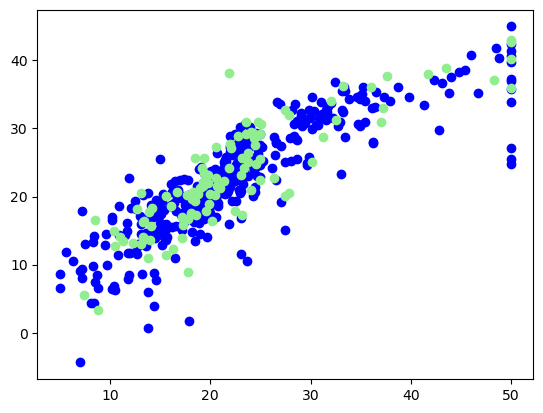

In [102]:
plt.scatter(ytrain ,ytrain_predict, c='blue', marker='o', label='Training data')
plt.scatter(ytest ,ytest_predict, c='lightgreen', marker='o', label='Test data')
plt.plot()
plt.show()